<a href="https://colab.research.google.com/github/jadsomjose/data_well/blob/main/carregar_dado_po%C3%A7o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/jadsomjose/data_well.git


Cloning into 'data_well'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 48 (delta 11), reused 48 (delta 11), pack-reused 0
Unpacking objects: 100% (48/48), done.


In [ ]:
pip install lasio


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lasio

In [ ]:
# carregando dados
#alaska1 = lasio.read('data_well/dados_alaska/dado1.las').df()
#alaska2 = lasio.read('data_well/dados_alaska/dado2.las').df()
#alaska3 = lasio.read('data_well/dados_alaska/dado3.las').df()
#alaska4 = lasio.read('data_well/dados_alaska/dado4.las').df()
#alaska5 = lasio.read('data_well/dados_alaska/dado5.las').df()
#alaska6 = lasio.read('data_well/dados_alaska/dado6.las').df()
#alaska7 = lasio.read('data_well/dados_alaska/dado7.las').df()
#alaska8 = lasio.read('data_well/dados_alaska/dado8.las').df()
#alaska9 = lasio.read('data_well/dados_alaska/dado9.las').df()
norne1 = lasio.read('data_well/dado_norne/660810-B-4AH.las').df()
norne2 = lasio.read('data_well/dado_norne/660810-C-1H.las').df()
norne3 = lasio.read('data_well/dado_norne/660810-C-2H.las').df()
norne4 = lasio.read('data_well/dado_norne/660810-C-3H.las').df()
norne5 = lasio.read('data_well/dado_norne/660810-C-4AH.las').df()
norne6 = lasio.read('data_well/dado_norne/660810-D-4H.las').df()
norne7 = lasio.read('data_well/dado_norne/660810-E-3H.las').df()

In [ ]:
norne1

In [ ]:
norne1 = norne1.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB'])
norne2 = norne2.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB'])
#norne3 = norne3.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB'])
norne4 = norne4.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB'])
norne5 = norne5.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB'])
norne6 = norne6.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB'])
norne7 = norne7.dropna(subset=['DT', 'NPHI', 'VSH', 'DTS','RHOB'])

In [ ]:
norne1

,TVD,TVDSS,DT,DTS,GR,KLOGH,NPHI,PHIF,RHOB,SW,VSH
DEPTH,,,,,,,,,,,
3196.000,2575.1772,-2544.1772,86.6725,172.2732,96.6444,1.7680,0.2576,0.0771,2.5069,0.5073,0.4072
3196.125,2575.2207,-2544.2207,90.5224,171.0457,93.0198,0.6011,0.2458,0.0350,2.6117,0.9880,0.3669
3196.250,2575.2642,-2544.2642,91.7761,170.0313,91.9090,0.6303,0.2417,0.0369,2.6042,0.8607,0.3545
3196.375,2575.3079,-2544.3079,93.3359,169.1582,91.9182,0.8857,0.2404,0.0501,2.5733,0.7056,0.3546
3196.500,2575.3513,-2544.3513,93.9531,168.7450,92.3022,1.2757,0.2399,0.0643,2.5360,0.5439,0.3589
...,...,...,...,...,...,...,...,...,...,...,...
3882.375,2814.7883,-2783.7883,93.0182,167.9510,58.4511,422.6047,0.2140,0.2649,2.1890,0.6156,0.0010
3882.500,2814.8784,-2783.8784,92.4579,167.9510,69.3898,373.2987,0.2152,0.2621,2.1899,0.5570,0.0101
3882.625,2814.9683,-2783.9683,92.3088,167.9510,75.1288,404.5169,0.2169,0.2639,2.1847,0.5267,0.0113


In [ ]:
VSH = norne1.loc[:, ['VSH']]
NPHI = norne1.loc[:, ['NPHI']]
RHOB = norne1.loc[:, ['RHOB']]
DTS = norne1.loc[:, ['DTS']]
DT = norne1.loc[:, ['DT']]

Calculando VP e VS

$V_P=10^3 \frac{0.3048}{\Delta t_P}$ --> km/s


In [ ]:
norne1['VP'] = (0.3048/norne1['DT'])*10**3 #VP
norne1['VS'] = (0.3048/norne1['DTS'])*10**3 #VP
vp1=norne1['VP']
vs1=norne1['VS']

In [ ]:
vs1

In [ ]:
depth = norne1.index

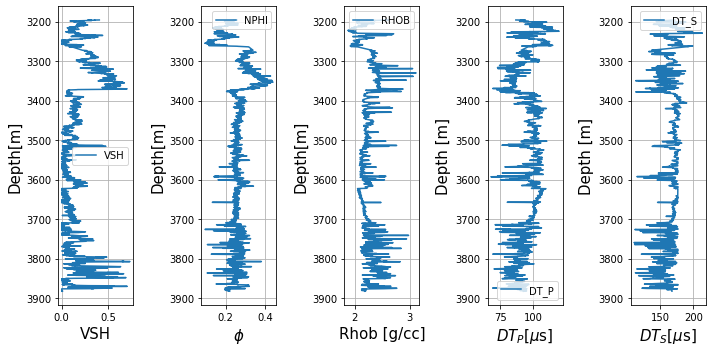

In [ ]:
f = plt.figure(figsize=(10,5))

ax1 = f.add_subplot(151)
ax1.plot(np.array(VSH),np.array(depth), label= 'VSH')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('VSH', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax2 = f.add_subplot(152)
ax2.plot(np.array(NPHI),np.array(depth), label= 'NPHI')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('$\phi$', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax3 = f.add_subplot(153)
ax3.plot(np.array(RHOB),np.array(depth), label= 'RHOB')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth[m]', size=15)
plt.xlabel('Rhob [g/cc]', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax4 = f.add_subplot(154)
ax4.plot(np.array(DT),np.array(depth), label= 'DT_P')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]', size=15)
plt.xlabel('$DT_P$[$\mu$s]', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)

ax5 = f.add_subplot(155)
ax5.plot(np.array(DTS),np.array(depth), label= 'DT_S')
plt.legend(loc= 'best')
plt.grid()
plt.gca().invert_yaxis()
plt.ylabel('Depth [m]', size=15)
plt.xlabel('$DT_S$[$\mu$s]', size=15)
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)
f.tight_layout()
plt.show()